In [1]:
### Data from [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of 
###   Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
### Codes from Towards Data Science web article -- by Susan Li, 2017
### The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.
### Direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict 
###    whether the client will subscribe (1/0) to a term deposit (variable y). Subscribe (Yes) == 1. No == 0.
### The data is a shortened version

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\kglim\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv('banking3.csv',header=0)
data=data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 20)
['Unnamed: 0', 'euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_single', 'education_illiterate', 'default_no', 'contact_cellular', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'poutcome_failure', 'poutcome_success', 'y']


In [3]:
data.head()
###  dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.

,Unnamed: 0,euribor3m,job_blue-collar,job_housemaid,marital_single,education_illiterate,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success,y
0,0,4.963,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,1,4.021,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2,0.729,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1
3,3,1.405,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,4,0.869,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1


In [4]:
### exploring the data/ .value_counts -- Return a Series containing counts of unique values.
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [5]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [6]:
### Note % of Yes, No imbalanced -- far too many Nos
### Explore features mean of those who bought the term deposit (y=1) and those who did not (y=0)
data.groupby('y').mean()

,Unnamed: 0,euribor3m,job_blue-collar,job_housemaid,marital_single,education_illiterate,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success
y,,,,,,,,,,,,,,,,,,,
0,20619.617954,3.811491,0.235745,0.026103,0.272190,0.000383,0.776814,0.609910,0.057267,0.151116,0.002545,0.178532,0.130212,0.007388,0.352495,0.100826,0.011027,0.099787,0.013106
1,20387.776078,2.123135,0.137500,0.022845,0.349138,0.000862,0.904526,0.830388,0.116164,0.141164,0.019181,0.139871,0.120474,0.059483,0.190948,0.089655,0.067888,0.130388,0.192672


In [7]:
y=data['y']  ### converts column var to a pandas core series 
y.shape

(41188,)

In [8]:
X=data.iloc[:,1:19]
X.shape

(41188, 18)

In [9]:
print(X)

       euribor3m  job_blue-collar  job_housemaid  marital_single  \
0          4.963                1              0               0   
1          4.021                0              0               0   
2          0.729                0              0               1   
3          1.405                0              0               0   
4          0.869                0              0               0   
...          ...              ...            ...             ...   
41183      4.866                0              0               0   
41184      4.860                0              1               0   
41185      4.857                0              0               1   
41186      0.742                0              0               0   
41187      4.859                0              0               1   

       education_illiterate  default_no  contact_cellular  month_apr  \
0                         0           0                 1          0   
1                         0           1

In [10]:
### now perform logit regression using statsmodel packaage
### using statsmodel here (and sklearn logistic regression later) more conveniently provides regression estimates
###   and p-values so exceedingly insignificant features can be discarded in logistic reg/due to redundancy or multicoll
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())
### as there are many categorical vars - dummies - we leave out adding a constant - also mostly dummies, no need to do scaling

Optimization terminated successfully.
         Current function value: 0.282267
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Sun, 26 Nov 2023   Pseudo R-squ.:                  0.1982
Time:                        10:34:40   Log-Likelihood:                -11626.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
euribor3m               -0.5243      0.013    -40.891      0.000      -0.549      -0.499

In [11]:
from sklearn.linear_model import LogisticRegression
###  from sklearn import metrics - this is optional as e.g. from sklearn.metrics import confusion_matrix
###   willimport the necessary sub-packages
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
Lresult=logreg.fit(X_train, y_train)

In [12]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [13]:
print(Lresult.coef_, Lresult.intercept_)

[[-0.50276771 -0.22836996 -0.17031727  0.05561977  0.68030654  0.27862183
   0.14060308 -0.62933588 -0.36323226 -0.18264397 -0.06522157 -0.14698165
   0.39278335 -1.25216265 -0.47031418  0.11110344 -0.35436337  1.47783127]] [-0.39095884]


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10880   101]
 [ 1125   251]]


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.71      0.18      0.29      1376

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [16]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_logreg = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_logreg)  
    # matches y_test of 1's and 0's versus pred prob of 1's for each of the 12357 test cases
    # sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    # this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_logreg = metrics.auc(fpr, tpr)
    # sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
    # Compute Area Under the Curve (AUC) using the trapezoidal rule.
    # This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score. 
roc_auc_logreg

0.7904865870329937

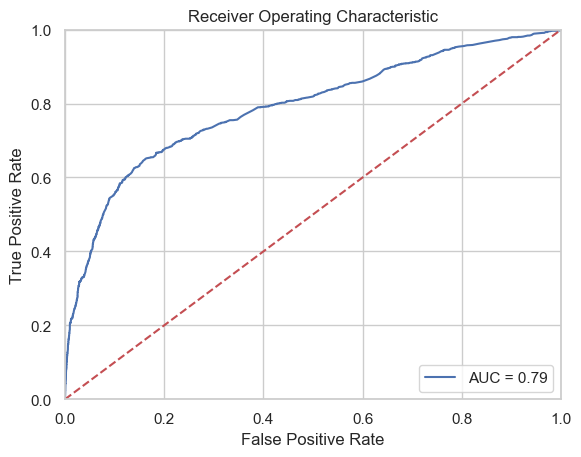

In [17]:
import matplotlib.pyplot as plt
plt.rc("font", size=14)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_logreg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=1000, random_state=1, max_features=None, max_depth=None)
### default n_estimators/trees = 100; default criterion = 'gini' 
### max_features -- The number of features to consider when looking for the best split:
###   default case is "sqrt"; or "log2", or None (all features), unlike DecisionTree Classifier where default case = "none"
### If max_depth=None, then nodes are expanded until all leaves are pure or until all leaves contain less than 
###   min_samples_split samples -- usu 2
### random_state -- resamples each of the n_estimators number of DTs
### bootsrapping - bagging, default=true
### oob_scorebool, default=False -- Whether to use out-of-bag samples to estimate the generalization score. 
###    Only available if bootstrap=True. That is, if there is resampling using bootstrap, then oob_scorebool can be True
RF_model.fit(X_train,y_train)

y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.8969814679938496


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_RF)
print(confusion_matrix)

[[10682   299]
 [  974   402]]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10981
           1       0.57      0.29      0.39      1376

    accuracy                           0.90     12357
   macro avg       0.74      0.63      0.67     12357
weighted avg       0.88      0.90      0.88     12357



In [21]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_RF = RF_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_RF)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 12357 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_RF = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
    ### Compute Area Under the Curve (AUC) using the trapezoidal rule.
    ### This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score. 
roc_auc_RF

0.7713693962404408

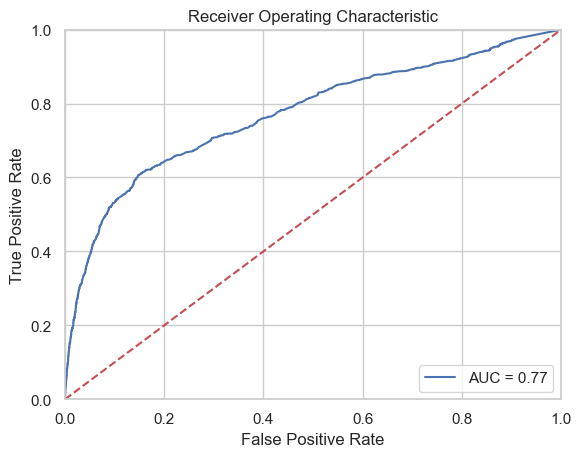

In [22]:
import matplotlib.pyplot as plt
plt.rc("font", size=14)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
import time
import numpy as np

start_time = time.time()
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
### importances.shape is (25,)

Elapsed time to compute the importances: 0.079 seconds


In [24]:
RF_model.feature_importances_  ### they sum to one

array([0.66008517, 0.03574613, 0.01397125, 0.05345306, 0.00142858,
       0.02407047, 0.02396583, 0.00984752, 0.00742382, 0.00411203,
       0.00757395, 0.00983875, 0.00365068, 0.02709057, 0.00552117,
       0.01970993, 0.02919743, 0.06331367])

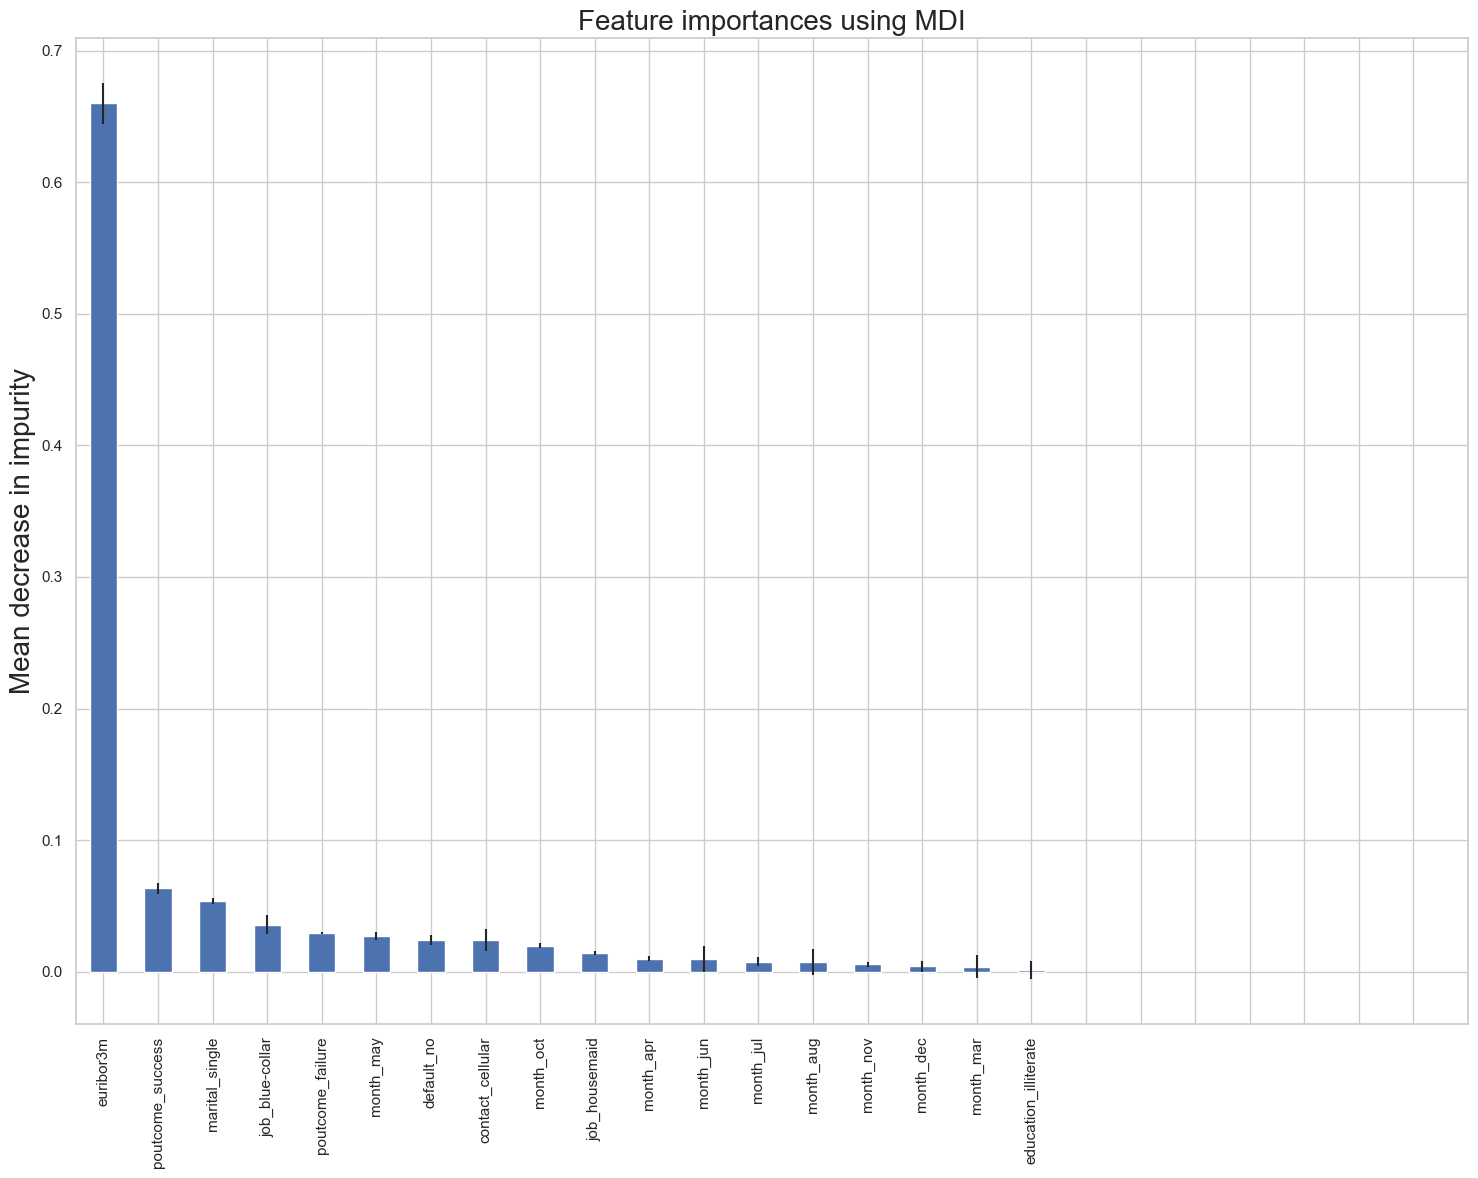

In [25]:
import pandas as pd

forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances.sort_values(ascending=False,inplace=True)

fig, ax = plt.subplots(figsize=(15,12))
forest_importances.plot.bar(yerr=std, ax=ax) 
### thin line indicates 1 std err from the mean either way -- doesn't mean mean decrease is neg
ax.set_title("Feature importances using MDI",fontsize=20)  ### MDI is mean decrease in impurity 
ax.set_ylabel("Mean decrease in impurity",fontsize=20)
ax.set(xticks=([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
 24,25]))
### define own x-ticks to avoid clutter, entry must be a list
fig.tight_layout()

### Note: Negative feature importance value means that feature makes the loss go up. 
### either model is underfitting with not enough iteration and not enough splitting use of feature or feature should be removed